___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe:
pd.set_option("display.max_columns", None)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [6]:
df = pd.read_csv('1-Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [7]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
#Seeing the shape of the data
df.shape

#The shape of the data is 10000 rows and 14 columns

(10000, 14)

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [13]:
#First let's see the head of the data
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [9]:
#To see the information of the data 
df.info()
#We can see that there are 10000 entries from 0 to 9999.
#Also, we have 2 float, 9 int, and 3 objects
#In all the columns, there is no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
#Checking if there is any null data
df.isnull().sum()
#As we can see there is no null data

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
#Checking the duplicated data
df.duplicated().sum()
#As we can see, there is no duplicated data

0

In [14]:
#Let's see the describtion of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


### Checking for missing values

<Axes: >

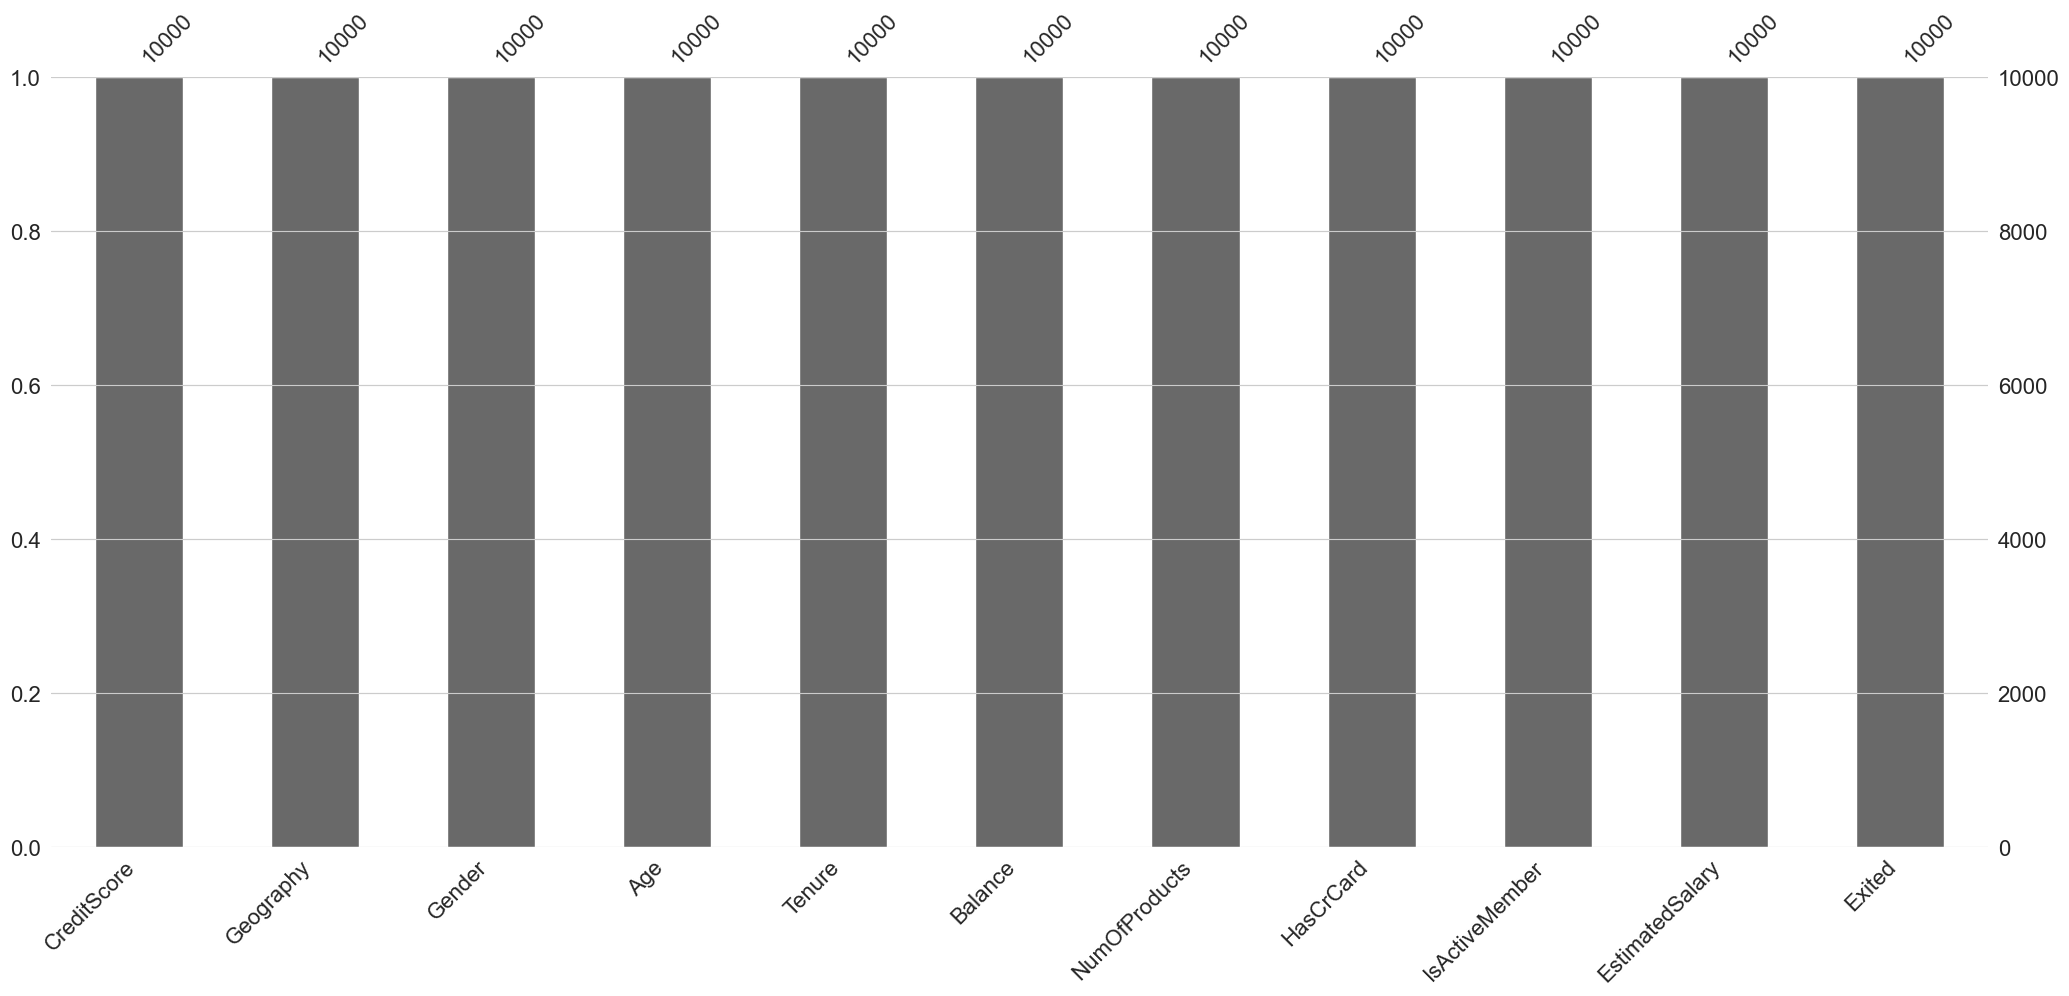

In [111]:
msno.bar(df)
#From the graph, we can see that there is no missing values

In [17]:
#The columns before deleting 
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [18]:
#The shape of the data before deleting
df.shape

(10000, 14)

### RowNumber, CustomerId, Surname

In [19]:
#First, let's see what is RowNumber: Row Numbers from 1 to 10000.
#So, this is not an important column, so I am going to drop it from the data

#CustomerId, A unique ID that identifies each customer. This is also,
#Not an important column and the model will not learn anything from the id.

#Also, I think surname which is the customer’s surname, is not an important thing as well.
#This is because the names do not make any difference. For example, if you are David, so you will
#open an account in the bank, but if you are June, you will not. Doesn't make sense, right.
#So, i will drop it as well.

df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [20]:
#The shape of the data after deleting
df.shape

(10000, 11)

In [22]:
#The columns of the data after deleting
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

### CreditScore

In [23]:
df['CreditScore'].value_counts()

CreditScore
850    233
678     63
655     54
705     53
667     53
684     52
670     50
651     50
683     48
652     48
648     48
660     48
682     47
663     47
640     47
637     46
714     45
686     45
710     45
645     45
633     45
687     45
679     45
706     44
627     44
646     44
619     44
584     43
625     43
628     43
608     43
613     42
635     42
632     42
701     41
554     41
712     41
698     41
601     40
699     40
597     40
634     40
606     40
680     40
644     39
711     39
681     39
656     39
592     38
593     38
659     38
718     38
611     38
630     38
666     38
696     38
641     38
581     38
605     37
675     37
695     37
624     37
629     37
614     37
579     37
653     37
662     37
616     37
639     37
650     37
642     37
724     37
607     36
649     36
622     36
676     36
727     36
636     36
709     36
590     36
707     36
697     36
669     36
661     35
673     35
668     35
685     35
677     35
615     35
704     3

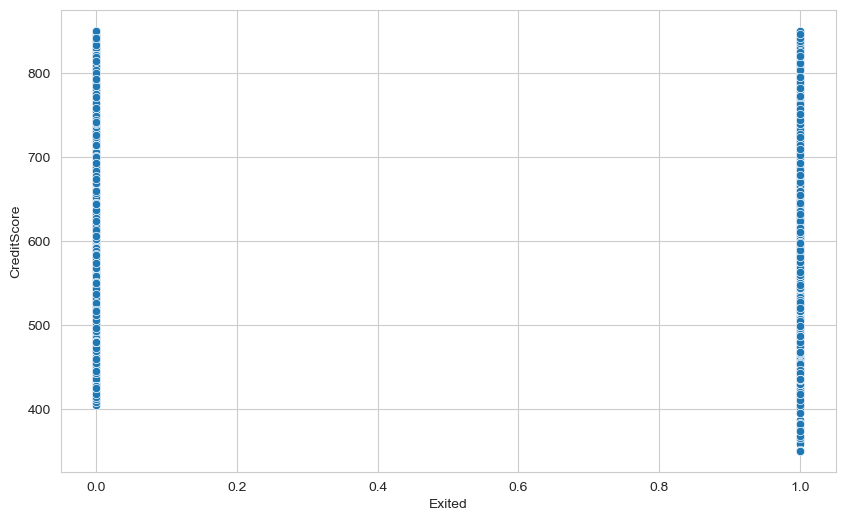

In [26]:
#Seeing the scatterplot of CreditScore with our target
sns.scatterplot(x='Exited', y='CreditScore', data=df)
plt.show()

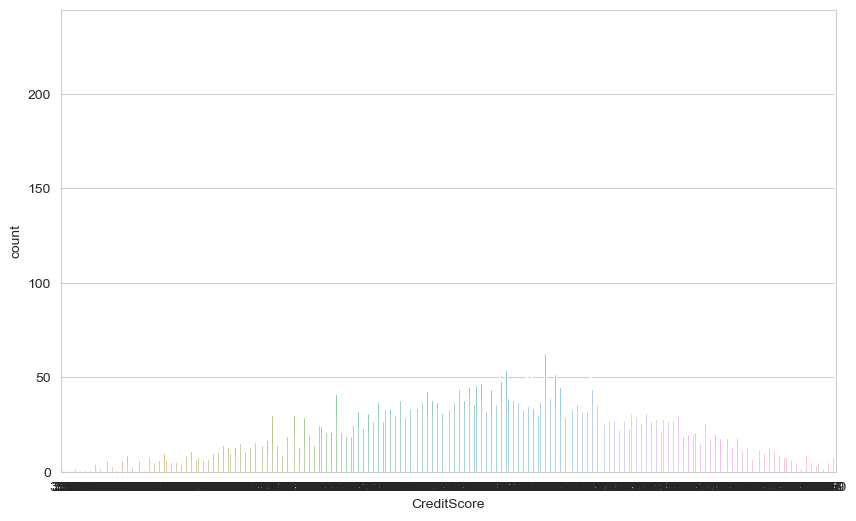

In [35]:
#Seeing the countplot of CreditScore
sns.countplot(x=df["CreditScore"])
plt.show()

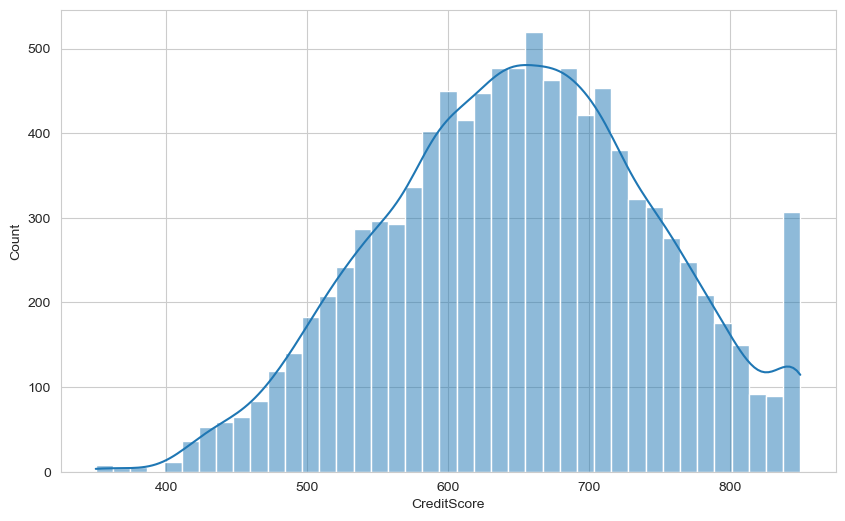

In [33]:
#Seeing the histplot of CreditScore with the target
sns.histplot(df["CreditScore"], kde=True)
plt.show()

### Geography

In [36]:
#Seeing the value counts of Geography
df['Geography'].value_counts()
#As we can see, there are three different regions here, but france has the highest number.

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

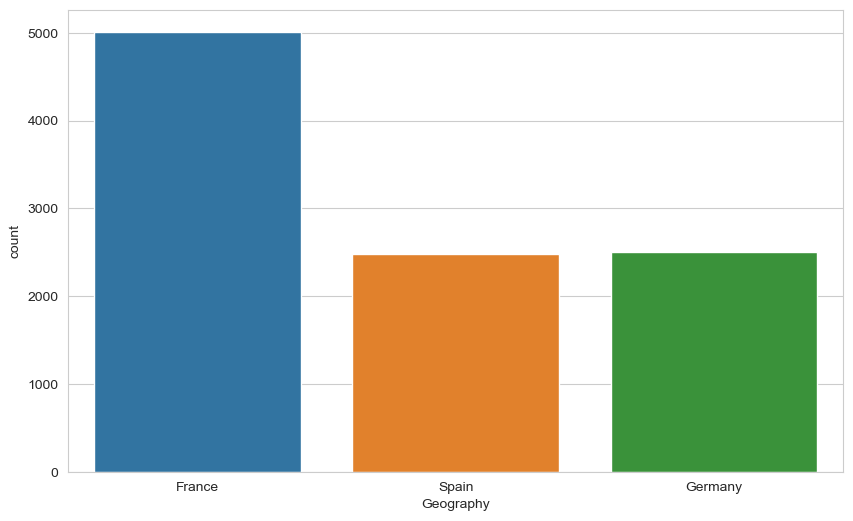

In [37]:
#Seeing the countplot of Geography
sns.countplot(x=df['Geography'])
plt.show()
#From the graph, we can see that the values of spain and Germany are nearly the same, but France is much higher

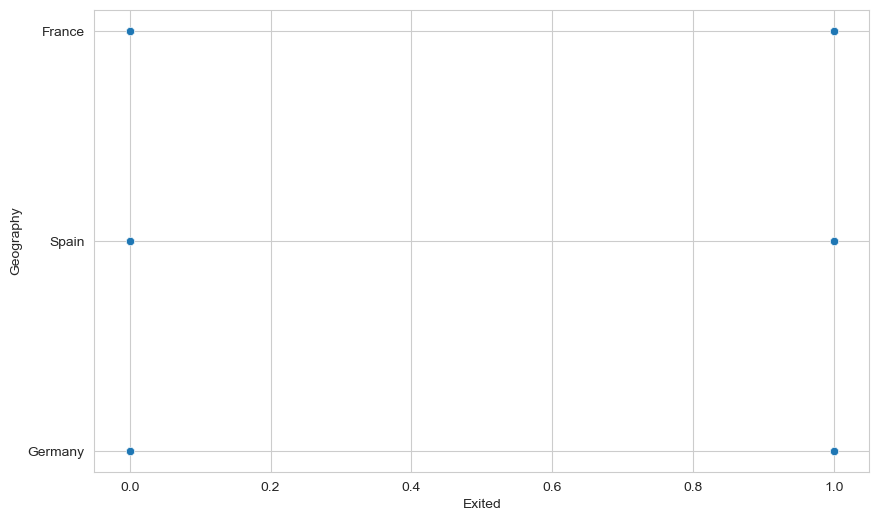

In [38]:
#Seeing the scatterplot of Geography with the target
sns.scatterplot(x='Exited', y='Geography', data=df)
plt.show()
#from the graph, we cannot get anythin from this graph, because our target is a binary.

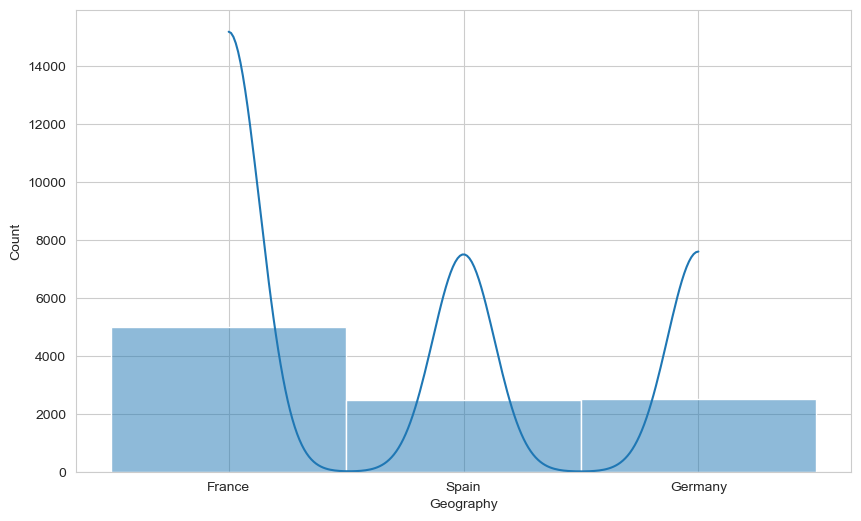

In [39]:
#Seeing the histplot of Geography
sns.histplot(df["Geography"], kde=True)
plt.show()

### Gender

In [48]:
df['Gender'].value_counts()
#As we can see, there are 5457 values in the Male, and 4543 in the Female

Gender
Male      5457
Female    4543
Name: count, dtype: int64

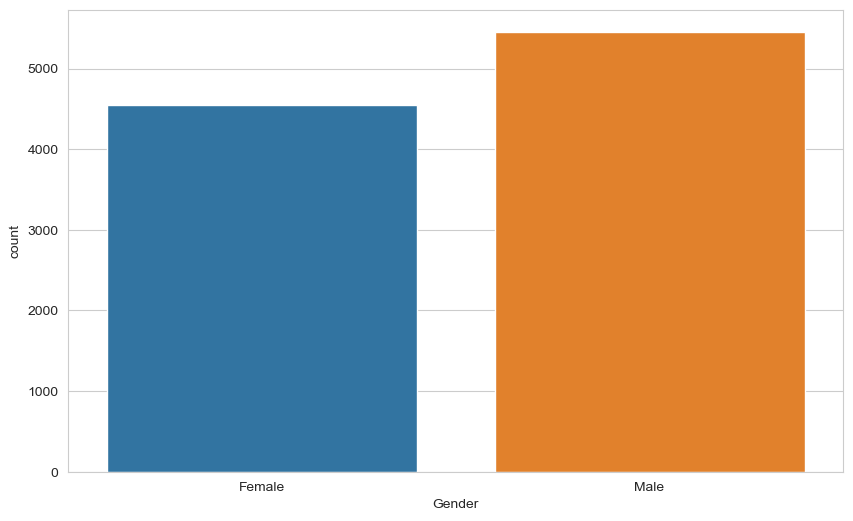

In [45]:
#Seeing the countplot of Gender
sns.countplot(x=df['Gender'])
plt.show()
#From the graph, we can say that there are more men.

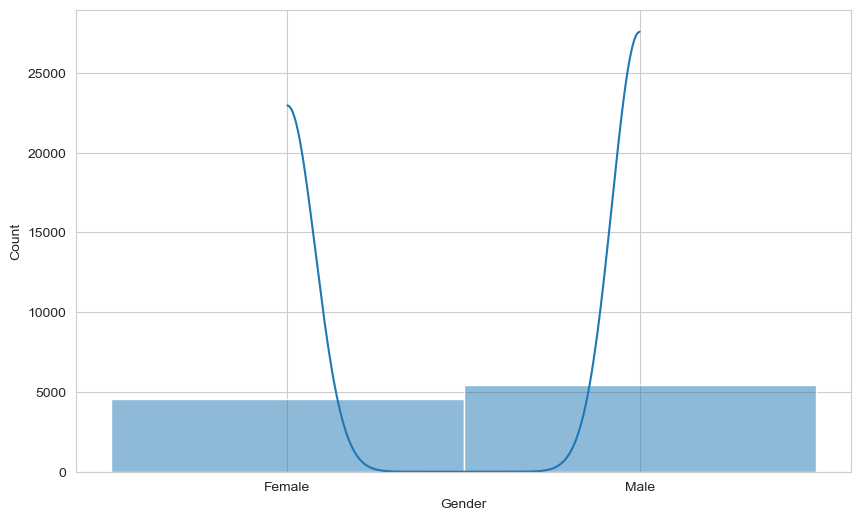

In [46]:
#Seeing the histplot of Gender
sns.histplot(df["Gender"], kde=True)
plt.show()

### Age

In [55]:
#Seeing the value counts of the age
df['Age'].value_counts()

Age
37    478
38    477
35    474
36    456
34    447
33    442
40    432
39    423
32    418
31    404
41    366
29    348
30    327
42    321
43    297
28    273
44    257
45    229
46    226
27    209
26    200
47    175
48    168
25    154
49    147
50    134
24    132
51    119
52    102
23     99
22     84
54     84
55     82
57     75
53     74
56     70
58     67
60     62
59     62
61     53
21     53
62     52
63     40
20     40
64     37
67     37
66     35
71     27
19     27
18     22
69     22
72     21
68     19
74     18
65     18
70     18
73     13
76     11
77     10
75      9
78      5
79      4
81      4
80      3
84      2
92      2
82      1
88      1
85      1
83      1
Name: count, dtype: int64

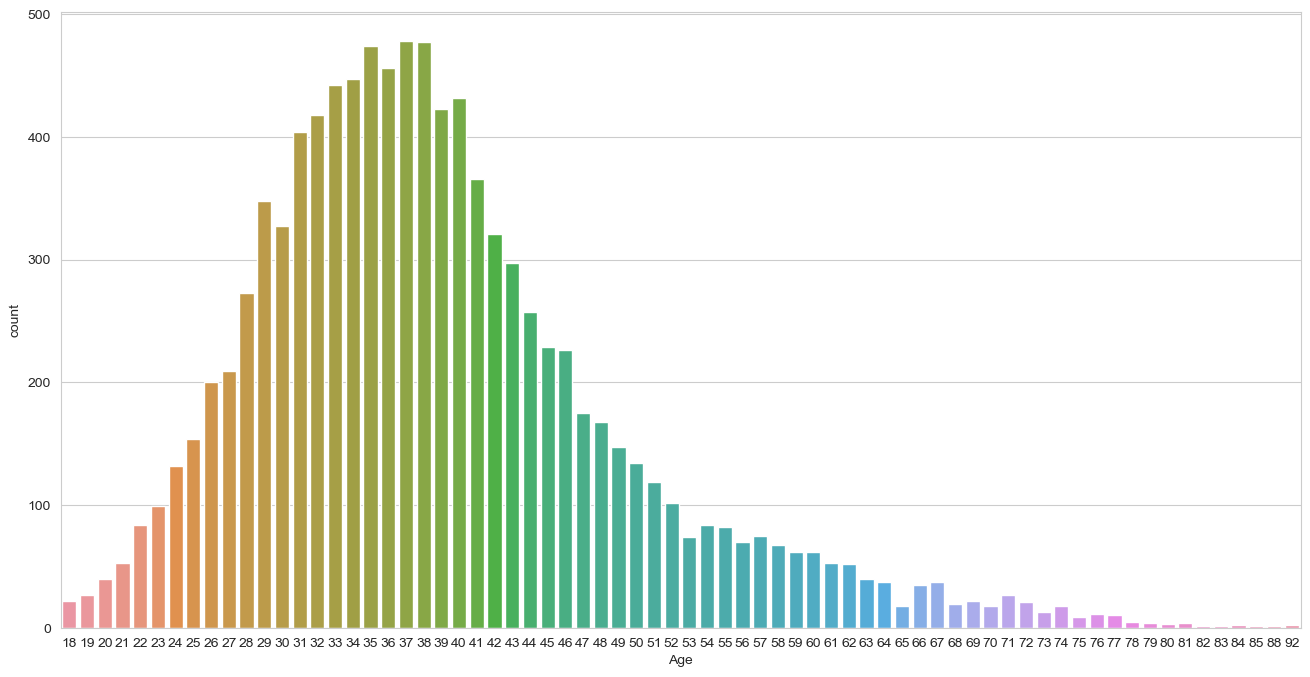

In [59]:
#Seeing the countplot of Age
plt.figure(figsize=(16, 8))
sns.countplot(x=df['Age'])
plt.show()
#From the graph, we can say that most values are in the middle, and in the end, nearly from 70, the values are so small

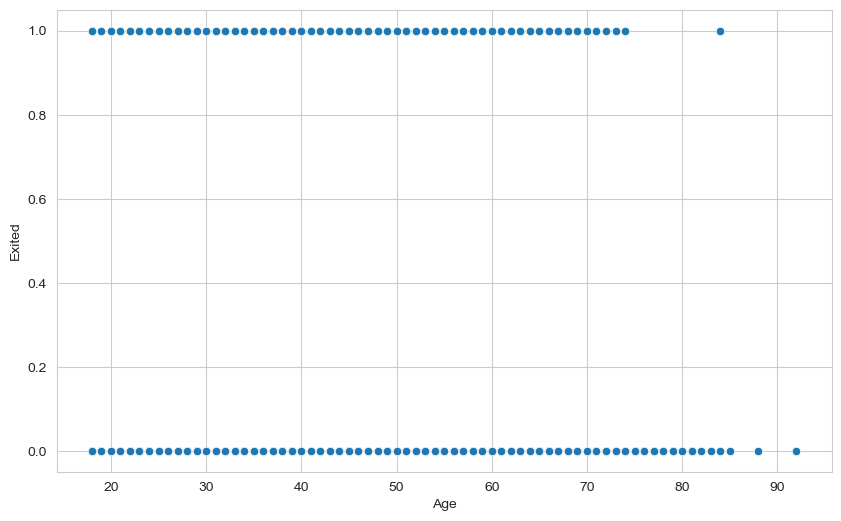

In [60]:
#Seeing the scatterplot of Age with the target
sns.scatterplot(x='Age', y='Exited', data=df)
plt.show()

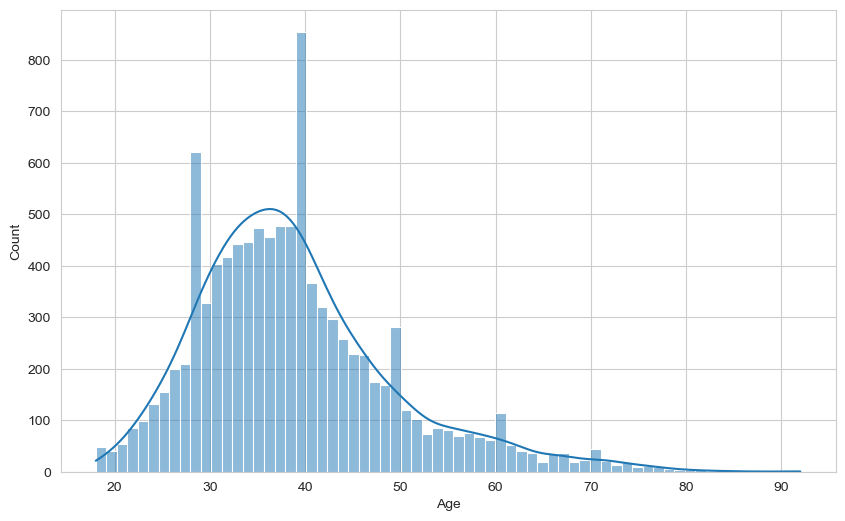

In [61]:
#Seeing the histplot of Age
sns.histplot(df["Age"], kde=True)
plt.show()
#From this graph also, we can see that the values at the end are so small

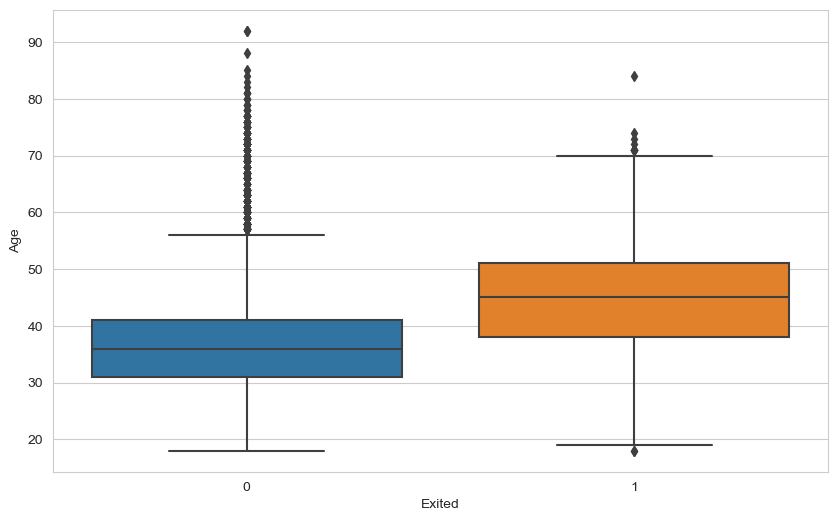

In [64]:
#Seeing the boxplot of the Age with the target
sns.boxplot(x='Exited', y='Age', data=df)
plt.show()
#From the graph, we can see that there are some outliers

### Tenure
#### The number of years for which the customer has been with the bank

In [66]:
#Seeing the value counts of Tenure
df['Tenure'].value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

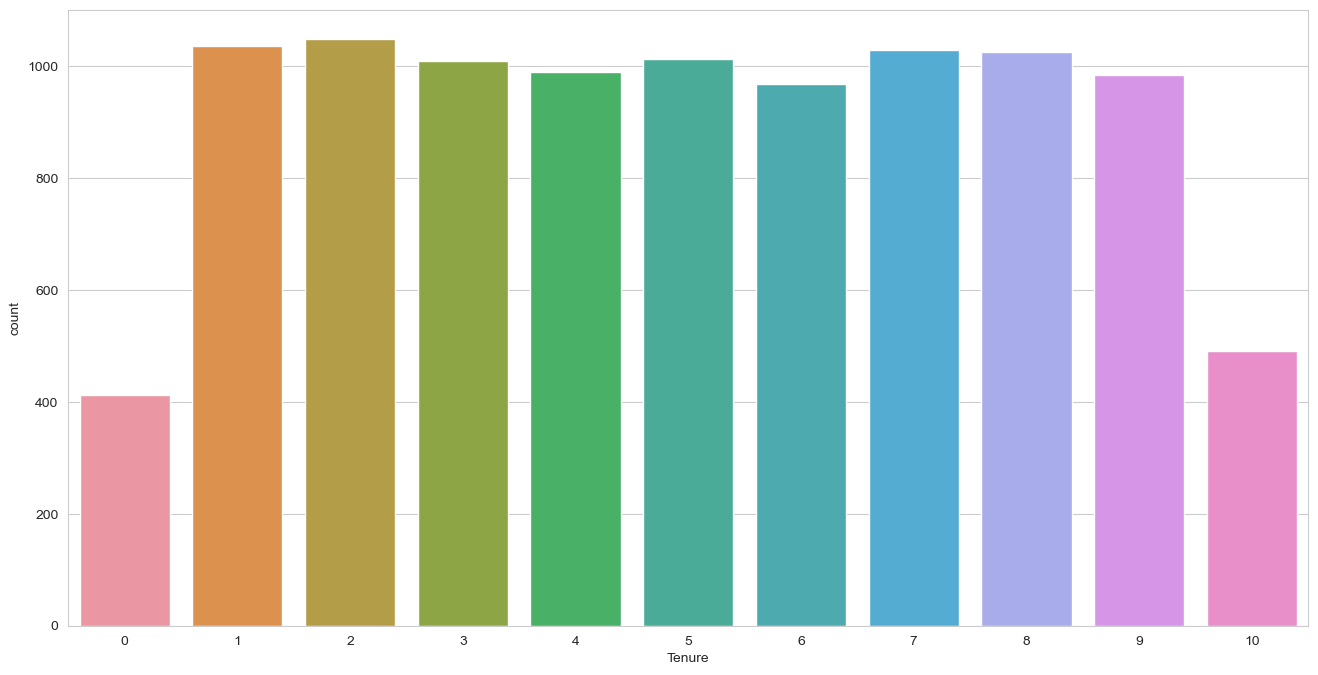

In [67]:
#Seeing the countplot of Tenure
plt.figure(figsize=(16, 8))
sns.countplot(x=df['Tenure'])
plt.show()
#From the graph, we can see that the value of 10 and 0 are the smallest ones

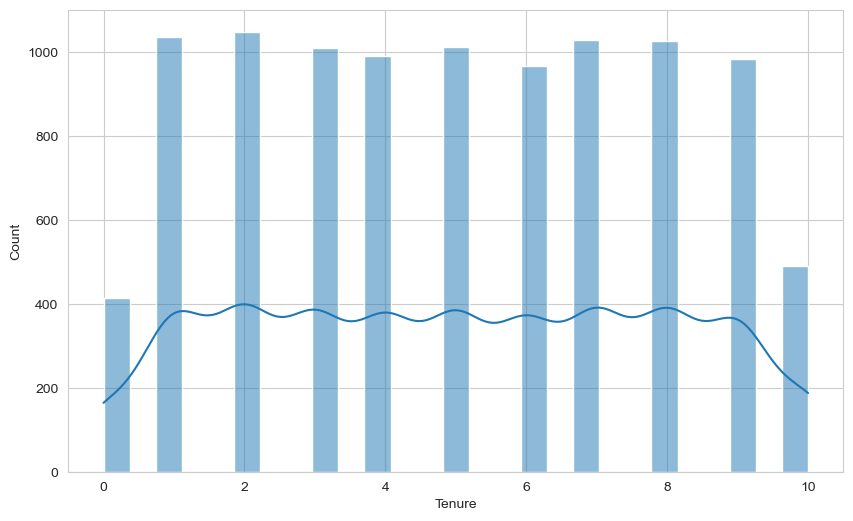

In [69]:
#Seeing the histplot of Tenure
sns.histplot(df["Tenure"], kde=True)
plt.show()

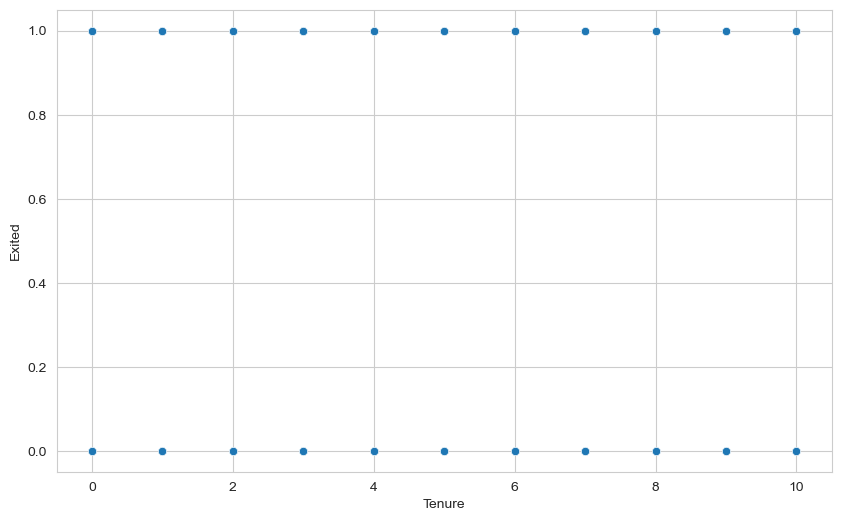

In [68]:
#Seeing the scatterplot of Tenure with the target
sns.scatterplot(x='Tenure', y='Exited', data=df)
plt.show()
#For scatterplot, we cannot see the data clearly because it is 0 and 1 only(the target I mean)

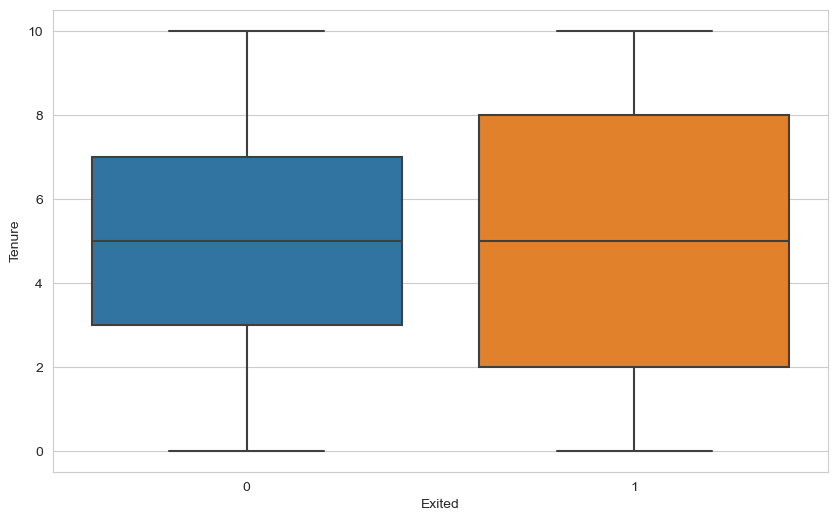

In [70]:
#Seeing the boxplot of the Tenure with the target
sns.boxplot(x='Exited', y='Tenure', data=df)
plt.show()

### Balance
#### Bank balance of the customer.

In [71]:
#Seeing the value counts of Balance
df['Balance'].value_counts()
#From the value counts of Balance, i can say that it may seems an important column, but i do not 
# think there is a pattern in it, as each one has a diffent number, and this may not help the model
#to learn from it, as all of them are just 1 value for each. 

Balance
0.000         3617
130170.820       2
105473.740       2
85304.270        1
159397.750       1
144238.700       1
112262.840       1
109106.800       1
142147.320       1
109109.330       1
146587.300       1
79896.000        1
132371.300       1
85859.760        1
69365.250        1
197715.930       1
95502.210        1
79857.640        1
142643.540       1
120923.520       1
126872.600       1
124213.360       1
138497.840       1
141952.070       1
125385.010       1
155271.830       1
172381.800       1
197200.040       1
127120.620       1
105103.330       1
98848.190        1
157274.360       1
104339.110       1
142946.180       1
109908.060       1
135847.470       1
108935.390       1
150300.650       1
131762.940       1
114453.580       1
128940.240       1
138106.750       1
143656.550       1
127406.500       1
107511.520       1
154377.300       1
125903.220       1
163085.790       1
144837.790       1
106116.560       1
123760.680       1
152160.210       1
1460

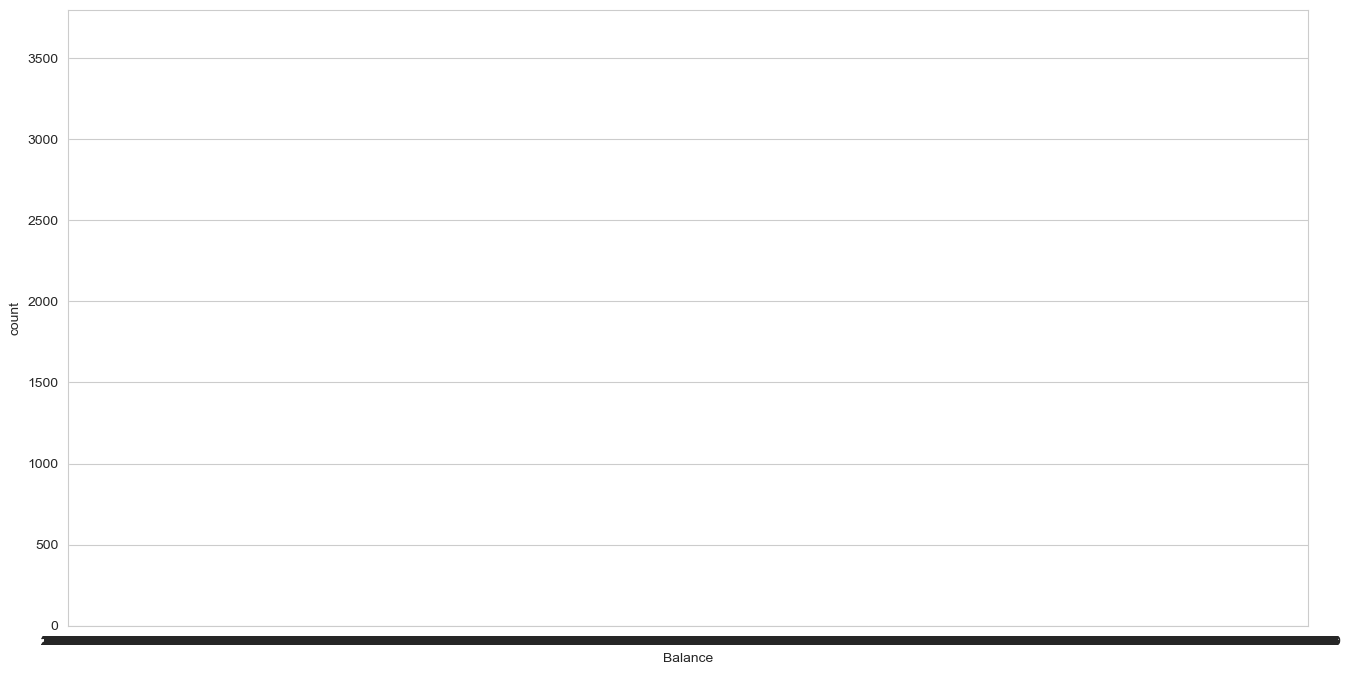

In [72]:
#Seeing the countplot of Balance
plt.figure(figsize=(16, 8))
sns.countplot(x=df['Balance'])
plt.show()

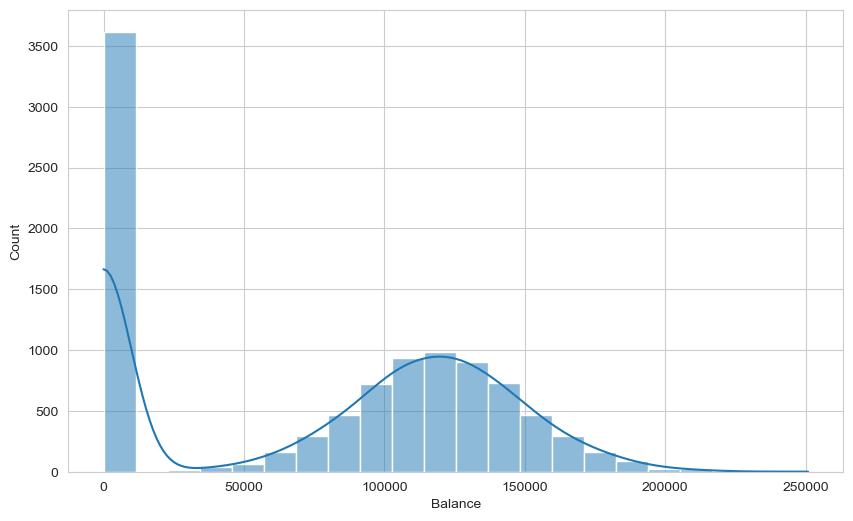

In [73]:
#Seeing the histplot of Balance
sns.histplot(df["Balance"], kde=True)
plt.show()

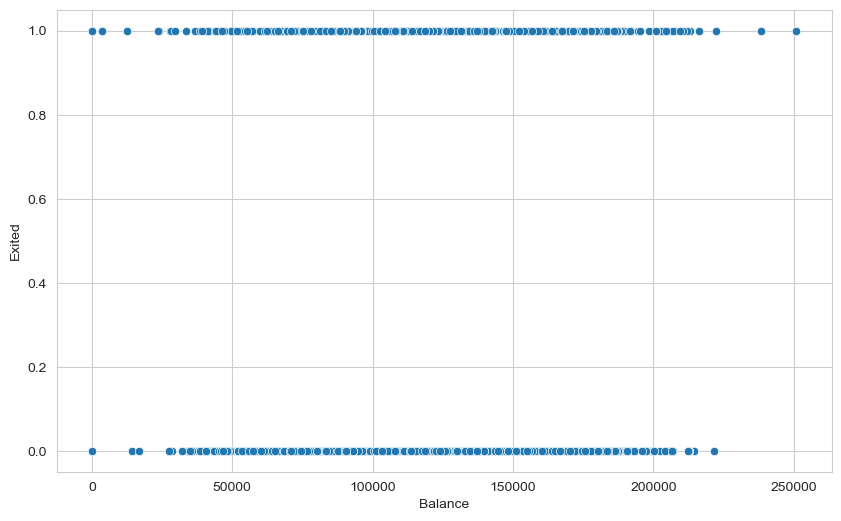

In [74]:
#Seeing the scatterplot of Balance with the target
sns.scatterplot(x='Balance', y='Exited', data=df)
plt.show()

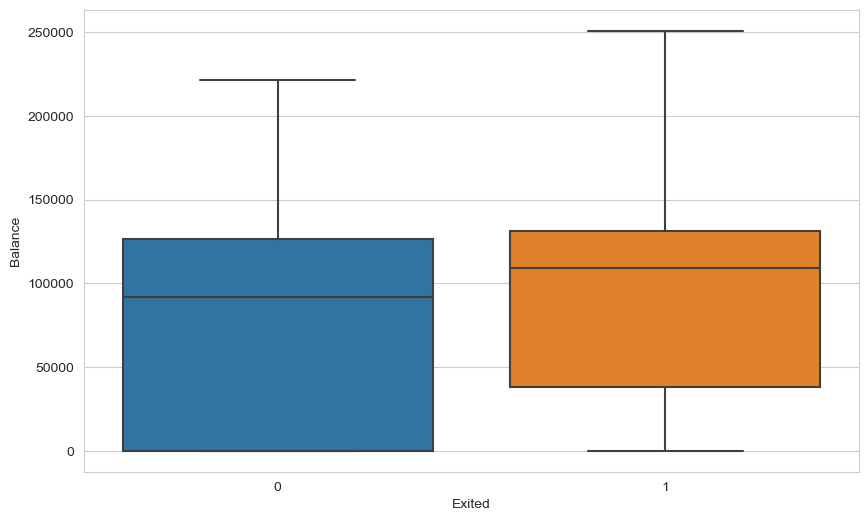

In [75]:
#Seeing the boxplot of the Balance with the target
sns.boxplot(x='Exited', y='Balance', data=df)
plt.show()

### NumOfProducts
#### The number of bank products the customer is utilising.

In [79]:
#Seeing the value counts of NumOfProducts
df['NumOfProducts'].value_counts()
#From the data, we can see that there are 4 types, but 3 and 4 have an insignificant values compared with the others

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

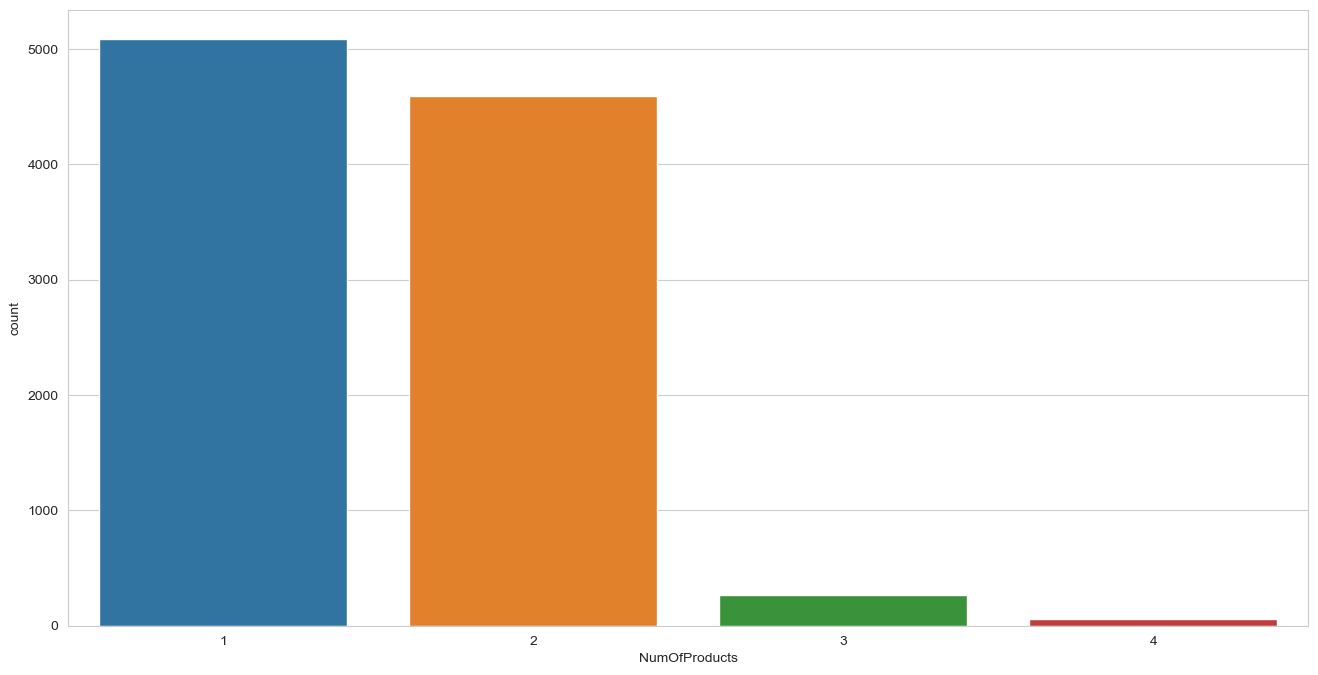

In [80]:
#Seeing the countplot of NumOfProducts
plt.figure(figsize=(16, 8))
sns.countplot(x=df['NumOfProducts'])
plt.show()
#We can see from the graph, most of the data are in 1 and 2.

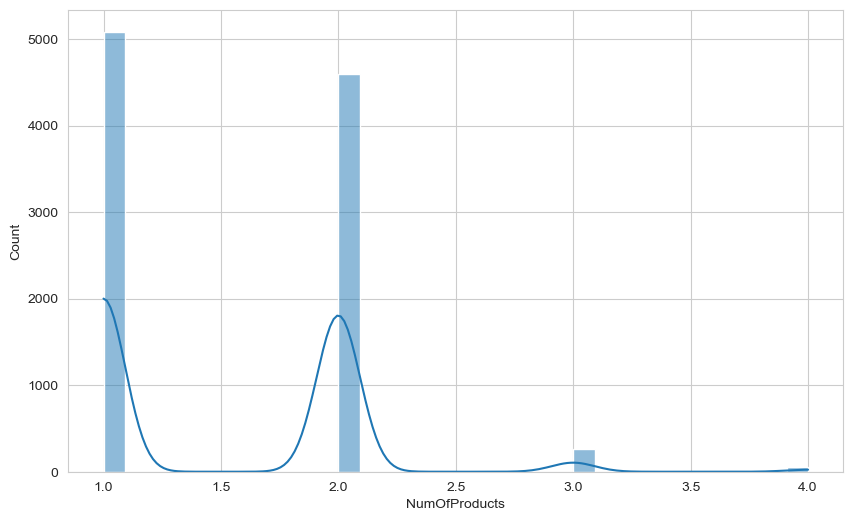

In [81]:
#Seeing the histplot of NumOfProducts
sns.histplot(df["NumOfProducts"], kde=True)
plt.show()

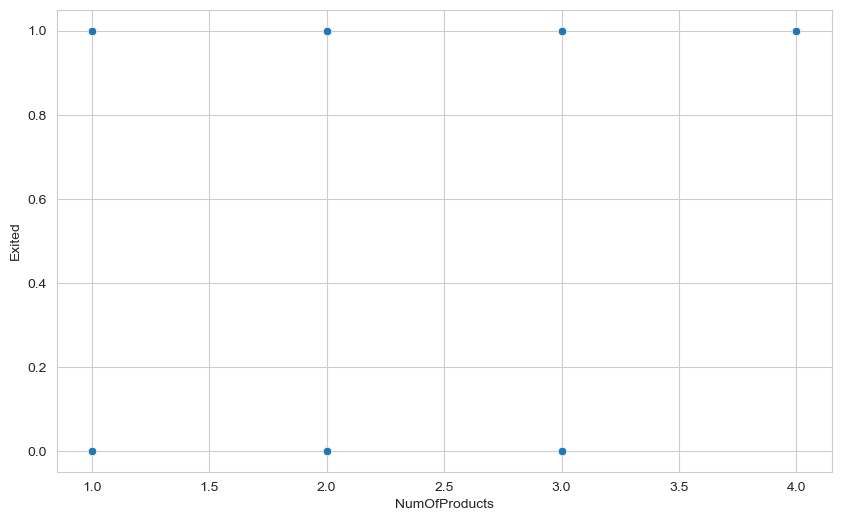

In [82]:
#Seeing the scatterplot of NumOfProducts with the target
sns.scatterplot(x='NumOfProducts', y='Exited', data=df)
plt.show()

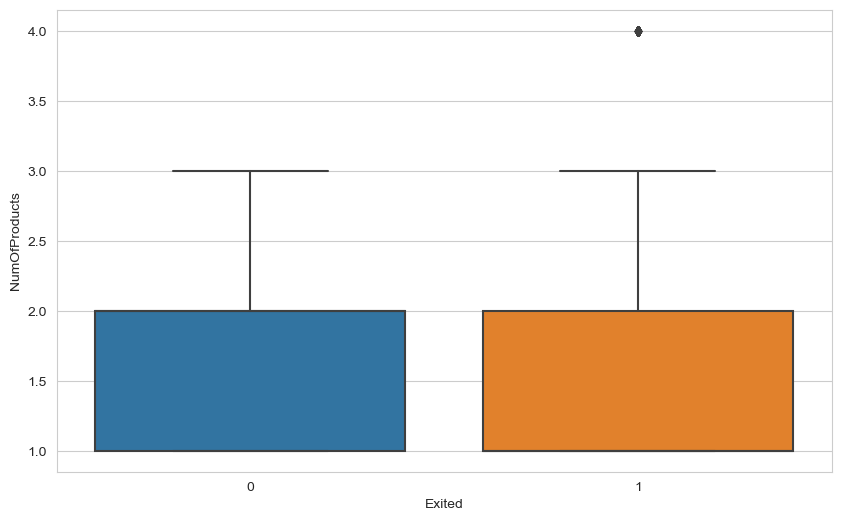

In [83]:
#Seeing the boxplot of the NumOfProducts with the target
sns.boxplot(x='Exited', y='NumOfProducts', data=df)
plt.show()
#This graph shows that there is an outlies at 4, which as we can see from the data previously, which contains 
#tiny values.

### HasCrCard
#### The number of credit cards given to the customer by the bank.

In [84]:
#Seeing the value counts of HasCrCard
df['HasCrCard'].value_counts()
#From the value counts of HasCrCard, we can see that we have binary values for this one, but the values of 1 is 
#much higher than 0. Not so balanced

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

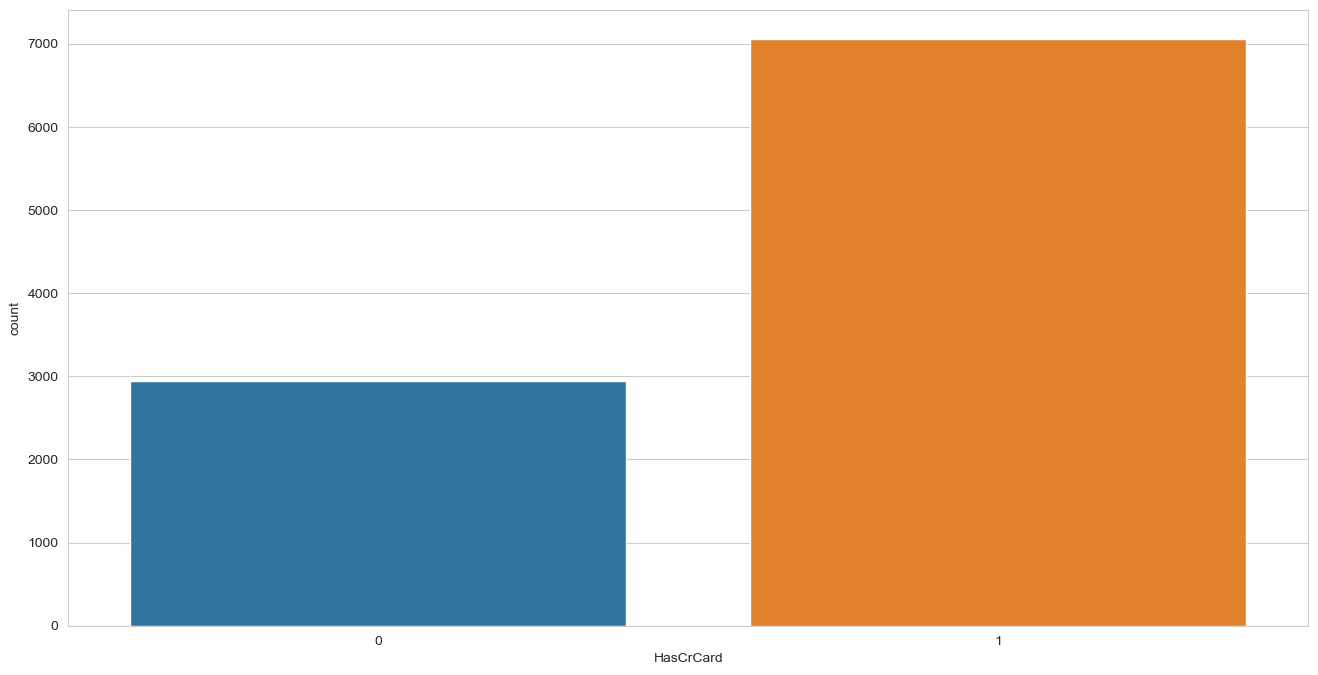

In [85]:
#Seeing the countplot of HasCrCard
plt.figure(figsize=(16, 8))
sns.countplot(x=df['HasCrCard'])
plt.show()
#We can see from the graph again, 1 has more values compared to 0

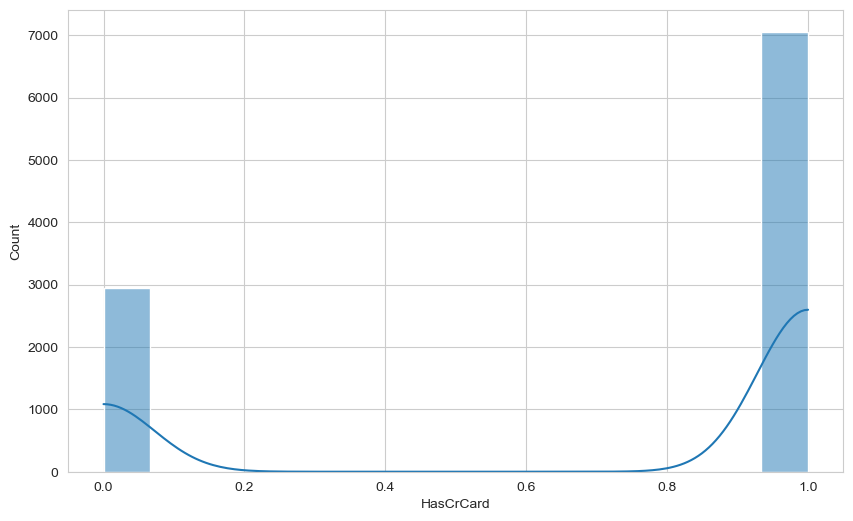

In [86]:
#Seeing the histplot of HasCrCard
sns.histplot(df["HasCrCard"], kde=True)
plt.show()

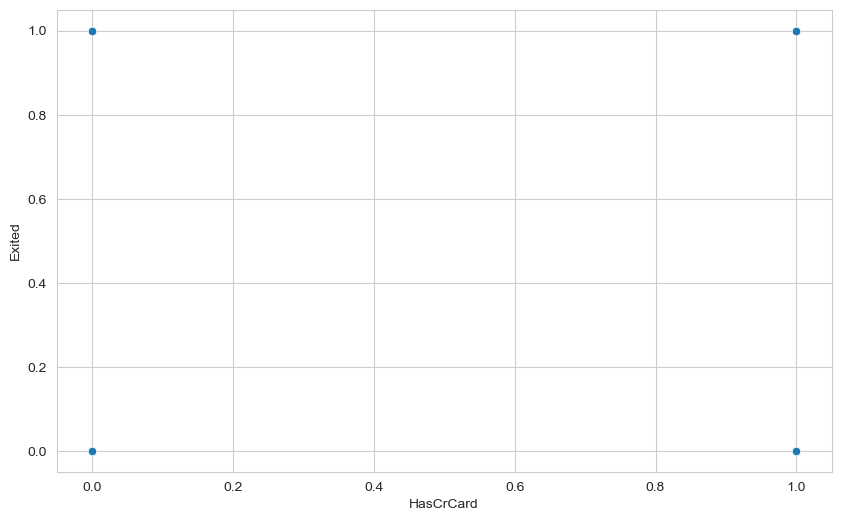

In [87]:
#Seeing the scatterplot of HasCrCard with the target
sns.scatterplot(x='HasCrCard', y='Exited', data=df)
plt.show()

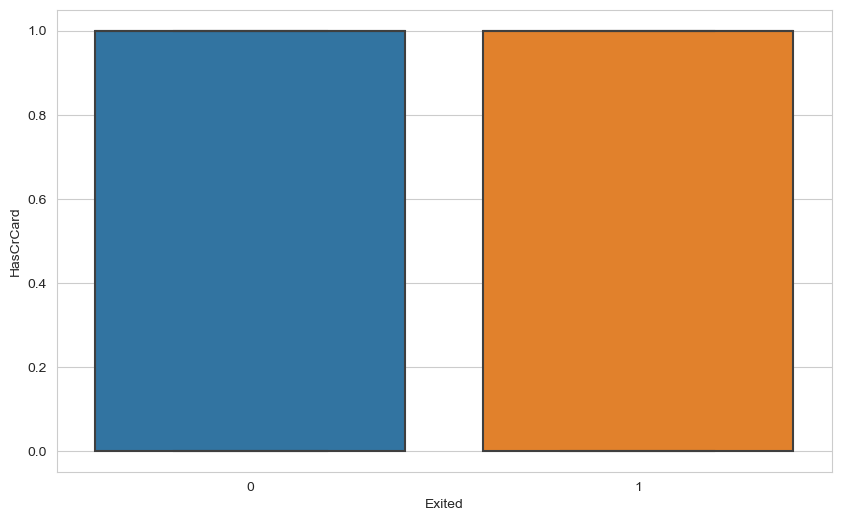

In [88]:
#Seeing the boxplot of the HasCrCard with the target
sns.boxplot(x='Exited', y='HasCrCard', data=df)
plt.show()

### IsActiveMember
#### Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")


In [89]:
#Seeing the value counts of IsActiveMember
df['IsActiveMember'].value_counts()
#From the value counts of IsActiveMember, we can see that it contains binary values 0 and 1.

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

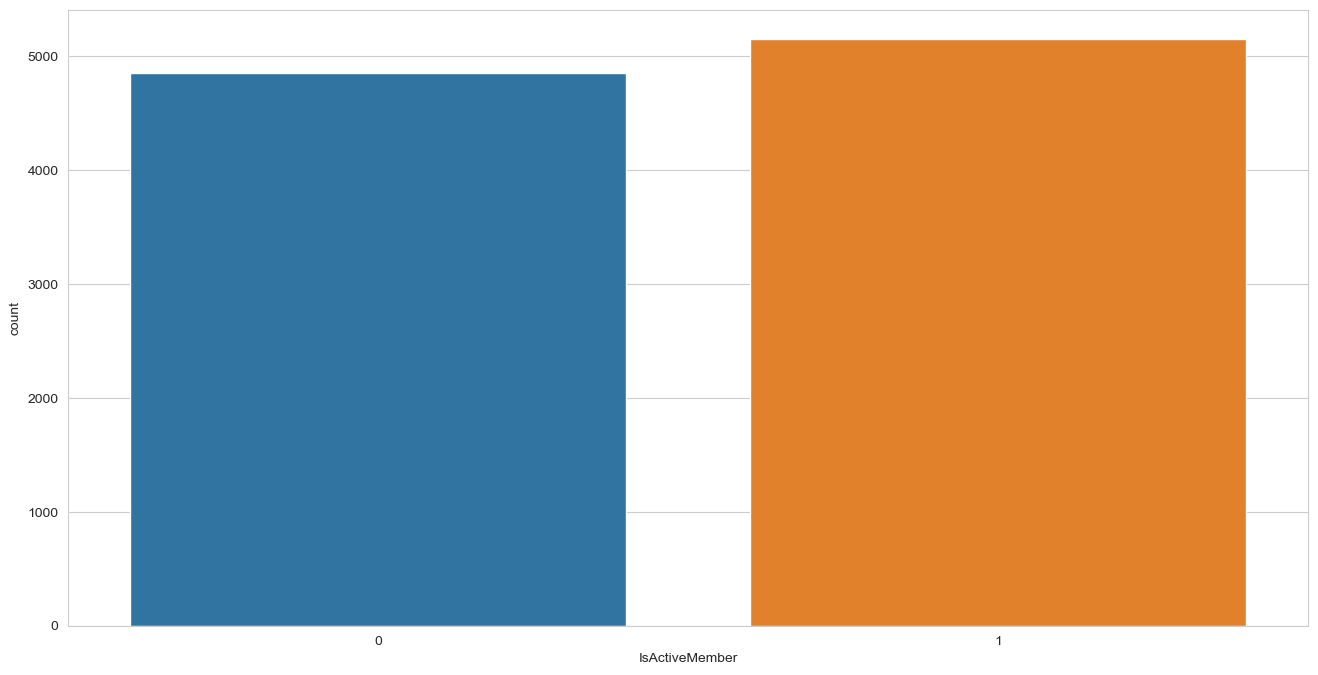

In [90]:
#Seeing the countplot of IsActiveMember
plt.figure(figsize=(16, 8))
sns.countplot(x=df['IsActiveMember'])
plt.show()
#The values of 1 and 0 are close, not big difference

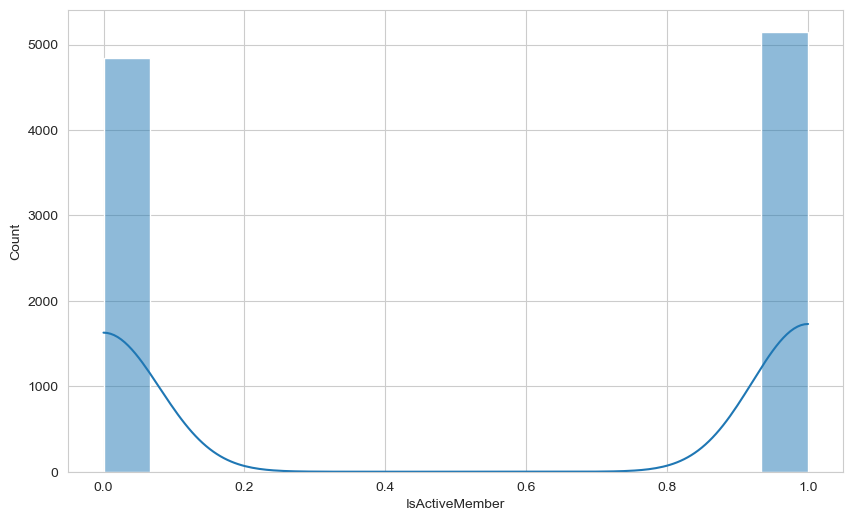

In [91]:
#Seeing the histplot of IsActiveMember
sns.histplot(df["IsActiveMember"], kde=True)
plt.show()

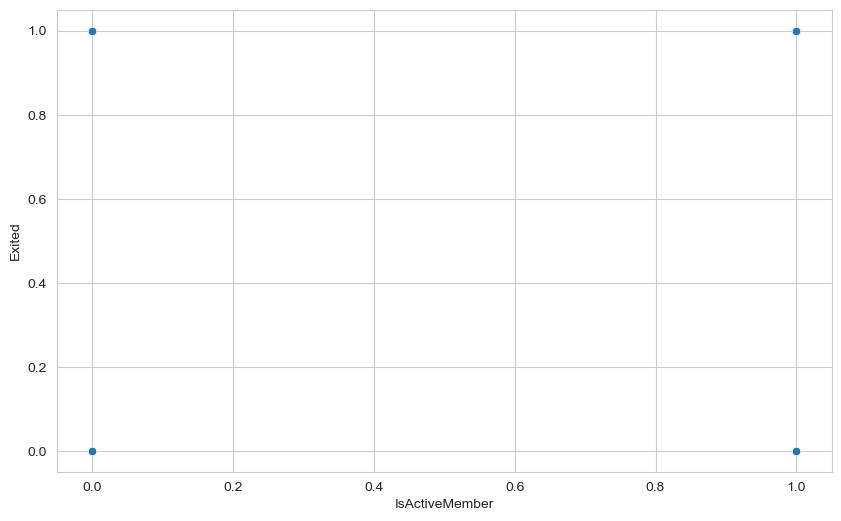

In [92]:
#Seeing the scatterplot of IsActiveMember with the target
sns.scatterplot(x='IsActiveMember', y='Exited', data=df)
plt.show()

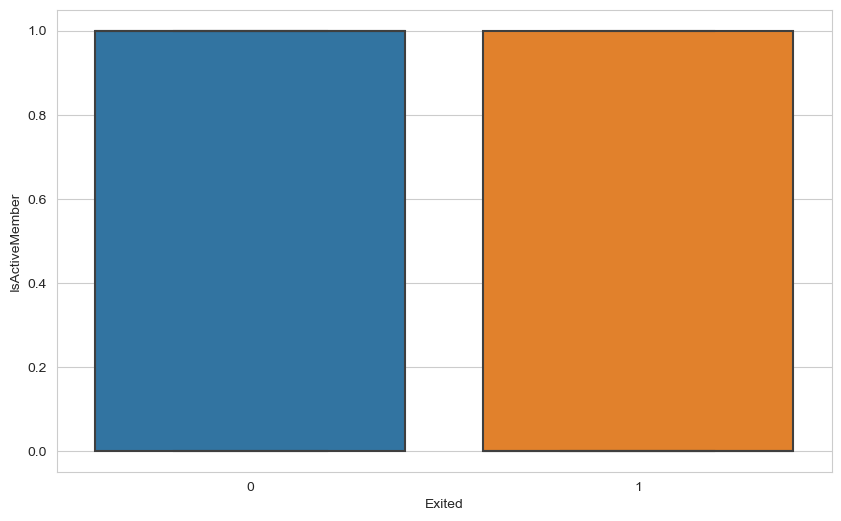

In [93]:
#Seeing the boxplot of the IsActiveMember with the target
sns.boxplot(x='Exited', y='IsActiveMember', data=df)
plt.show()

### EstimatedSalary

In [94]:
#Seeing the value counts of EstimatedSalary
df['EstimatedSalary'].value_counts()
#From the value counts of EstimatedSalary, the values are different from one to one.

EstimatedSalary
24924.920     2
101348.880    1
55313.440     1
72500.680     1
182692.800    1
4993.940      1
124964.820    1
161971.420    1
39488.040     1
187811.710    1
121505.610    1
184514.010    1
121311.120    1
12873.390     1
157238.050    1
123242.110    1
184399.760    1
57323.180     1
89874.820     1
31422.690     1
18988.580     1
19842.180     1
62627.550     1
197266.580    1
199992.480    1
16403.410     1
78854.570     1
189310.270    1
78088.170     1
103305.010    1
143301.490    1
116124.280    1
142730.270    1
58076.520     1
186123.570    1
29664.450     1
147963.070    1
38466.390     1
68293.930     1
10288.240     1
179446.310    1
118929.640    1
115037.670    1
187280.510    1
183540.220    1
28531.810     1
42730.120     1
104721.500    1
65219.850     1
70563.900     1
141453.620    1
139435.120    1
170347.100    1
131553.820    1
138344.700    1
169894.400    1
9770.970      1
74176.710     1
144880.810    1
101168.300    1
71672.860     1
61326.43

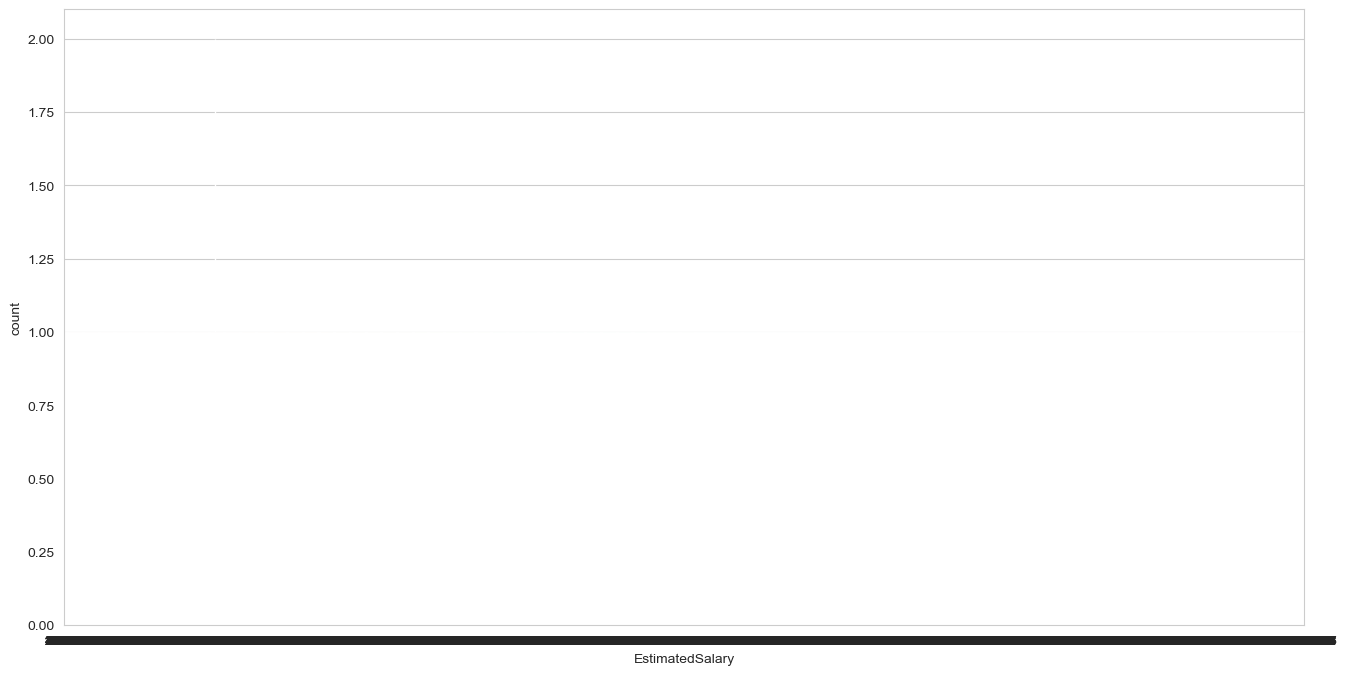

In [95]:
#Seeing the countplot of EstimatedSalary
plt.figure(figsize=(16, 8))
sns.countplot(x=df['EstimatedSalary'])
plt.show()

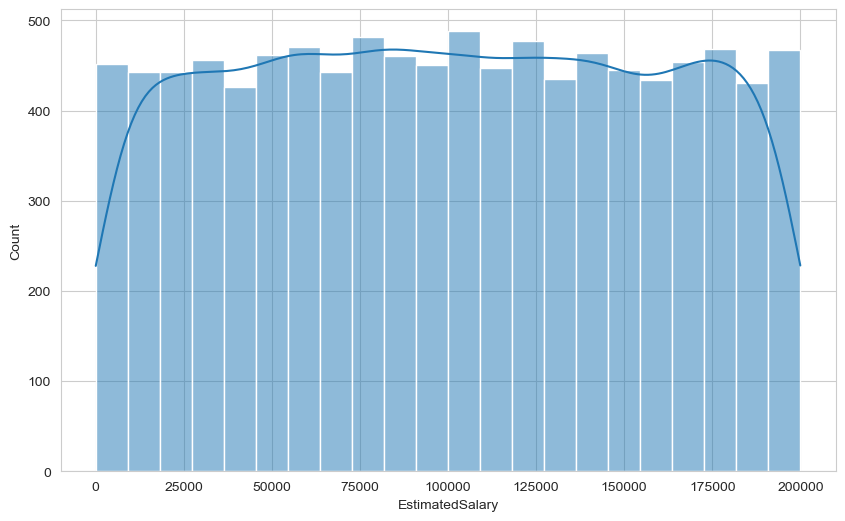

In [96]:
#Seeing the histplot of EstimatedSalary
sns.histplot(df["EstimatedSalary"], kde=True)
plt.show()

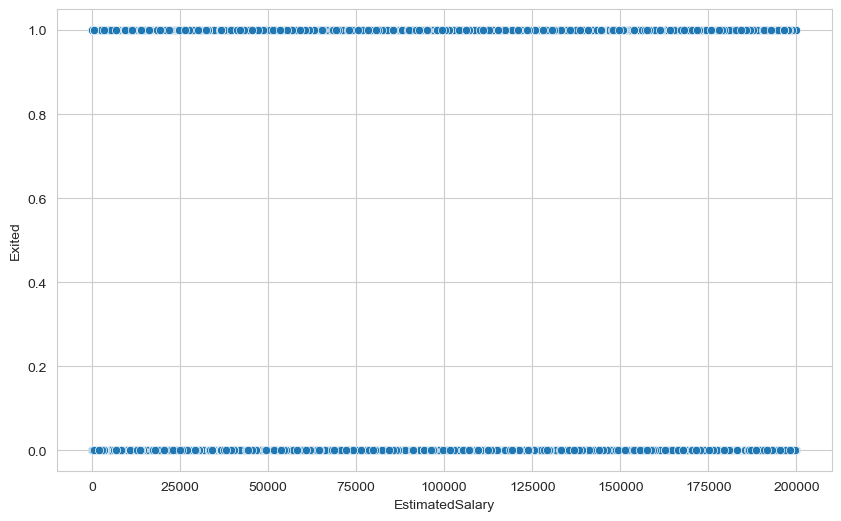

In [97]:
#Seeing the scatterplot of EstimatedSalary with the target
sns.scatterplot(x='EstimatedSalary', y='Exited', data=df)
plt.show()

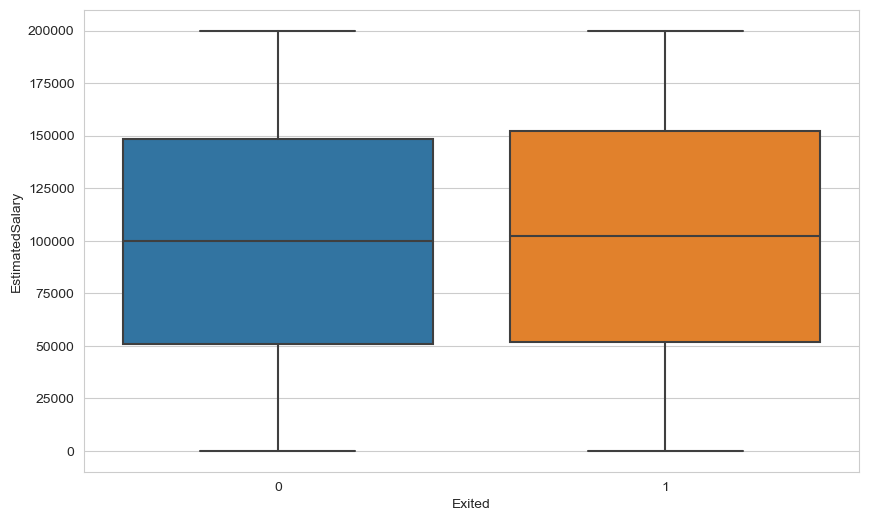

In [98]:
#Seeing the boxplot of the EstimatedSalary with the target
sns.boxplot(x='Exited', y='EstimatedSalary', data=df)
plt.show()

### Exited
#### Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

In [99]:
#Seeing the value counts of Exited
df['Exited'].value_counts()
#From the value counts of Exited, which is our target, we can see that the values of 0 is much bigger than 0, not
#so balanced.

Exited
0    7963
1    2037
Name: count, dtype: int64

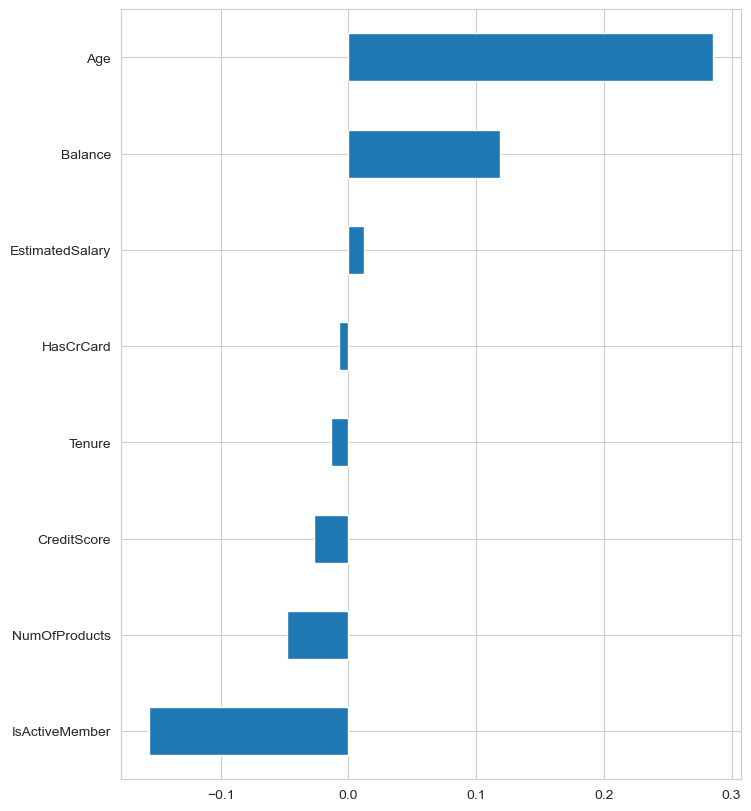

In [43]:
plt.figure(figsize=(8, 10))
df.corr(numeric_only=True)['Exited'].sort_values().drop('Exited').plot(kind='barh')
plt.show()

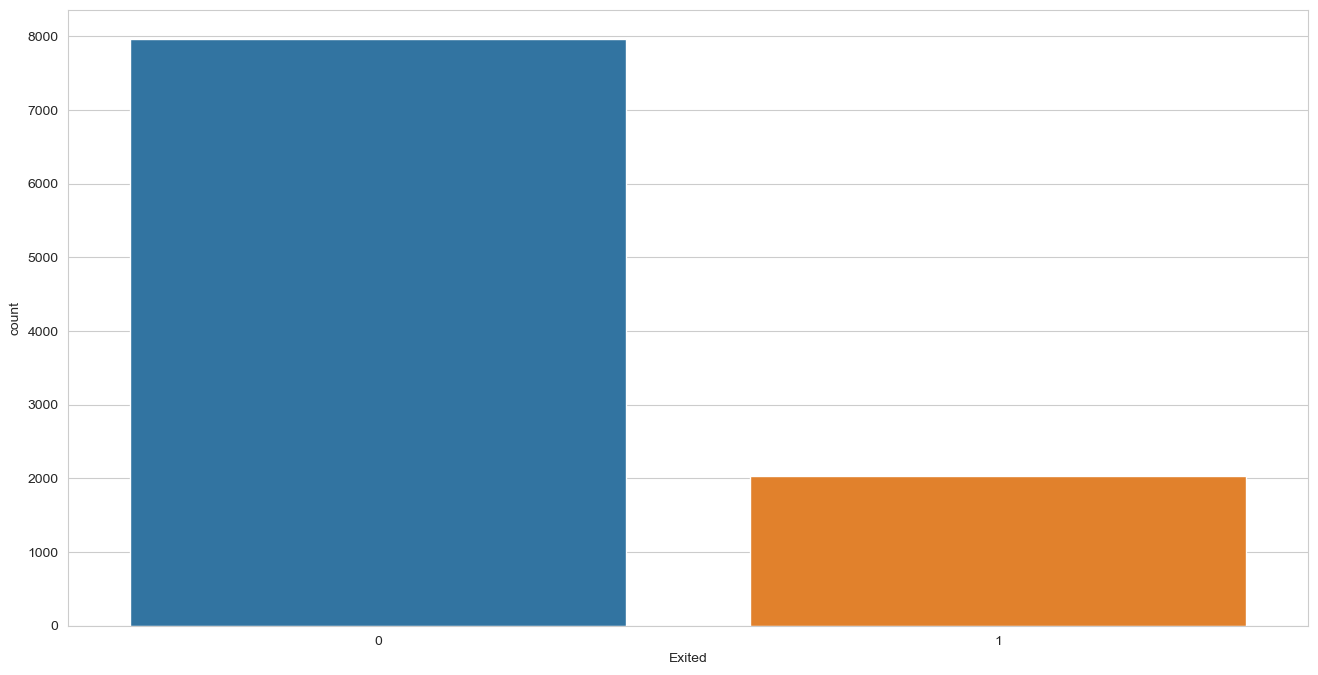

In [100]:
#Seeing the countplot of Exited
plt.figure(figsize=(16, 8))
sns.countplot(x=df['Exited'])
plt.show()
#From the graph we can see that the values of 0 is smaller

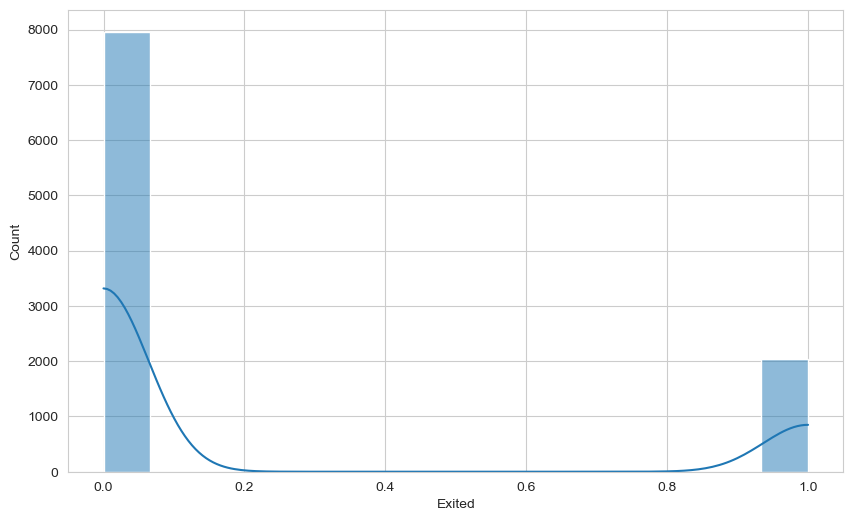

In [101]:
#Seeing the histplot of Exited
sns.histplot(df["Exited"], kde=True)
plt.show()

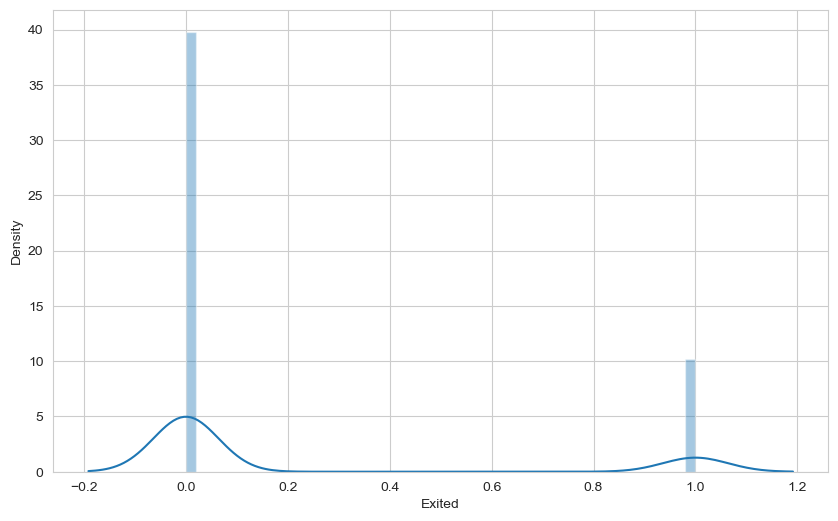

In [104]:
sns.distplot(df["Exited"])
plt.show()

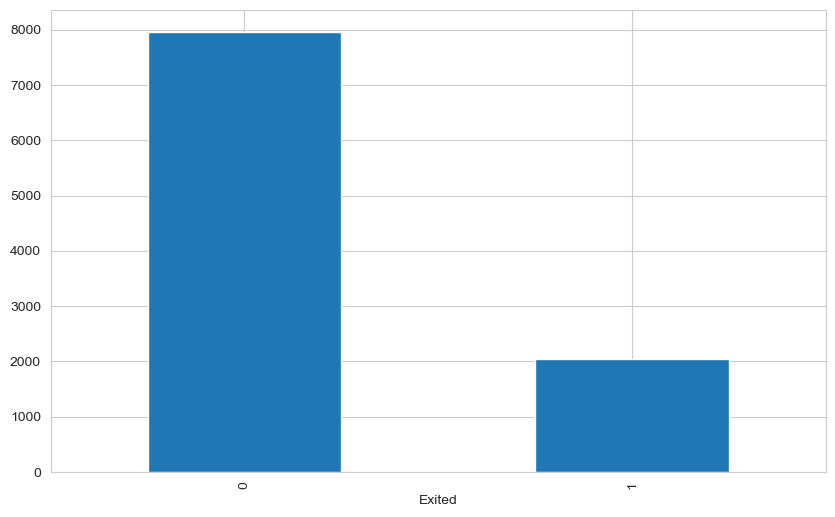

In [106]:
df["Exited"].value_counts().plot(kind="bar")
plt.show()

### Correlation

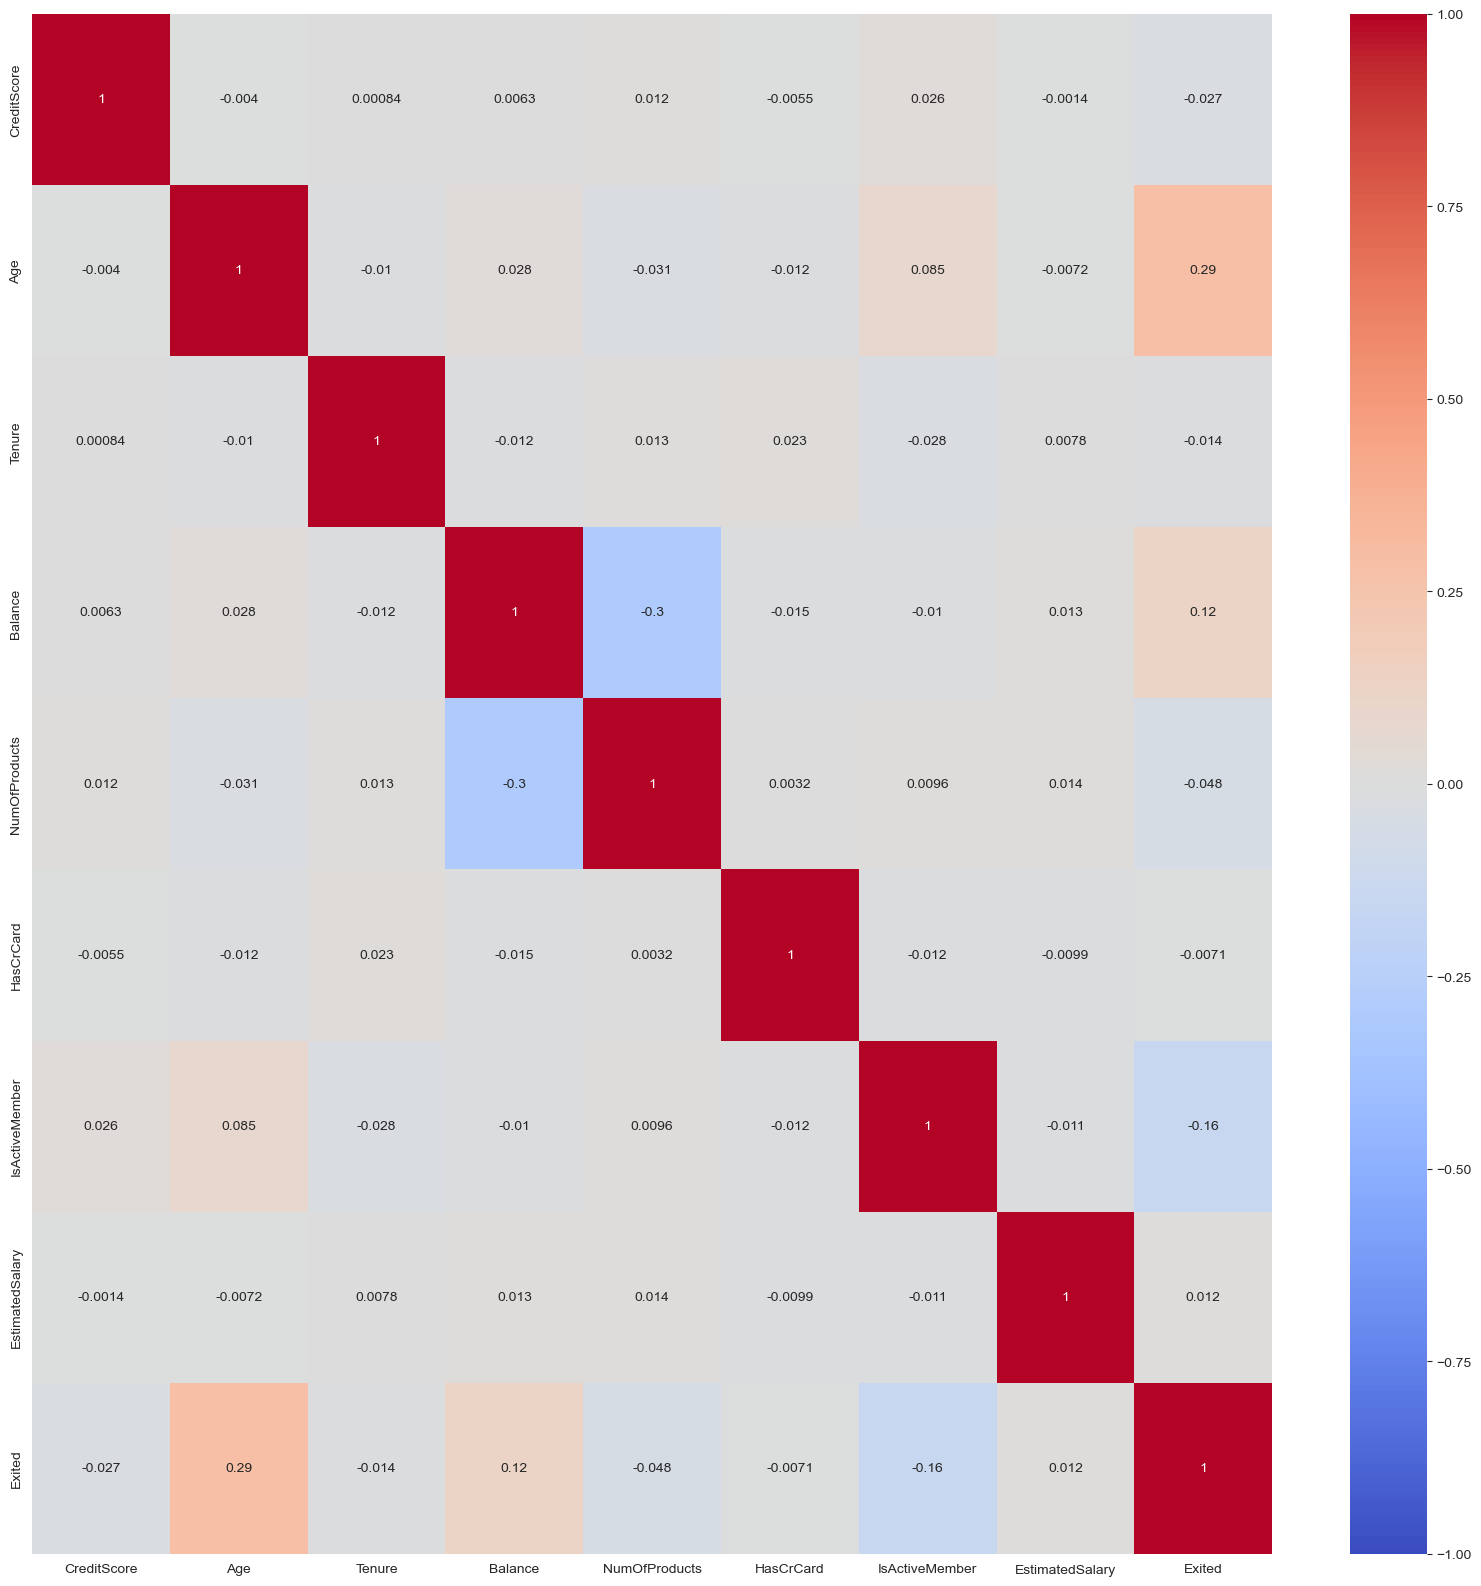

In [103]:
#Seeing if there is any correlation(multicorrelarity), by the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.show()
#from the heatmap, we can say that there is no correclation in the data, which is a good thing

In [109]:
#Checking for correlations
df.corr(numeric_only=True)[(abs(df.corr(numeric_only=True)) >= 0.9) & (abs(df.corr(numeric_only=True)) < 1) & (abs(df.corr(numeric_only=True)) <= -0.9) & (abs(df.corr(numeric_only=True)) > -1)].any().any()

False

### Pairplot for the data

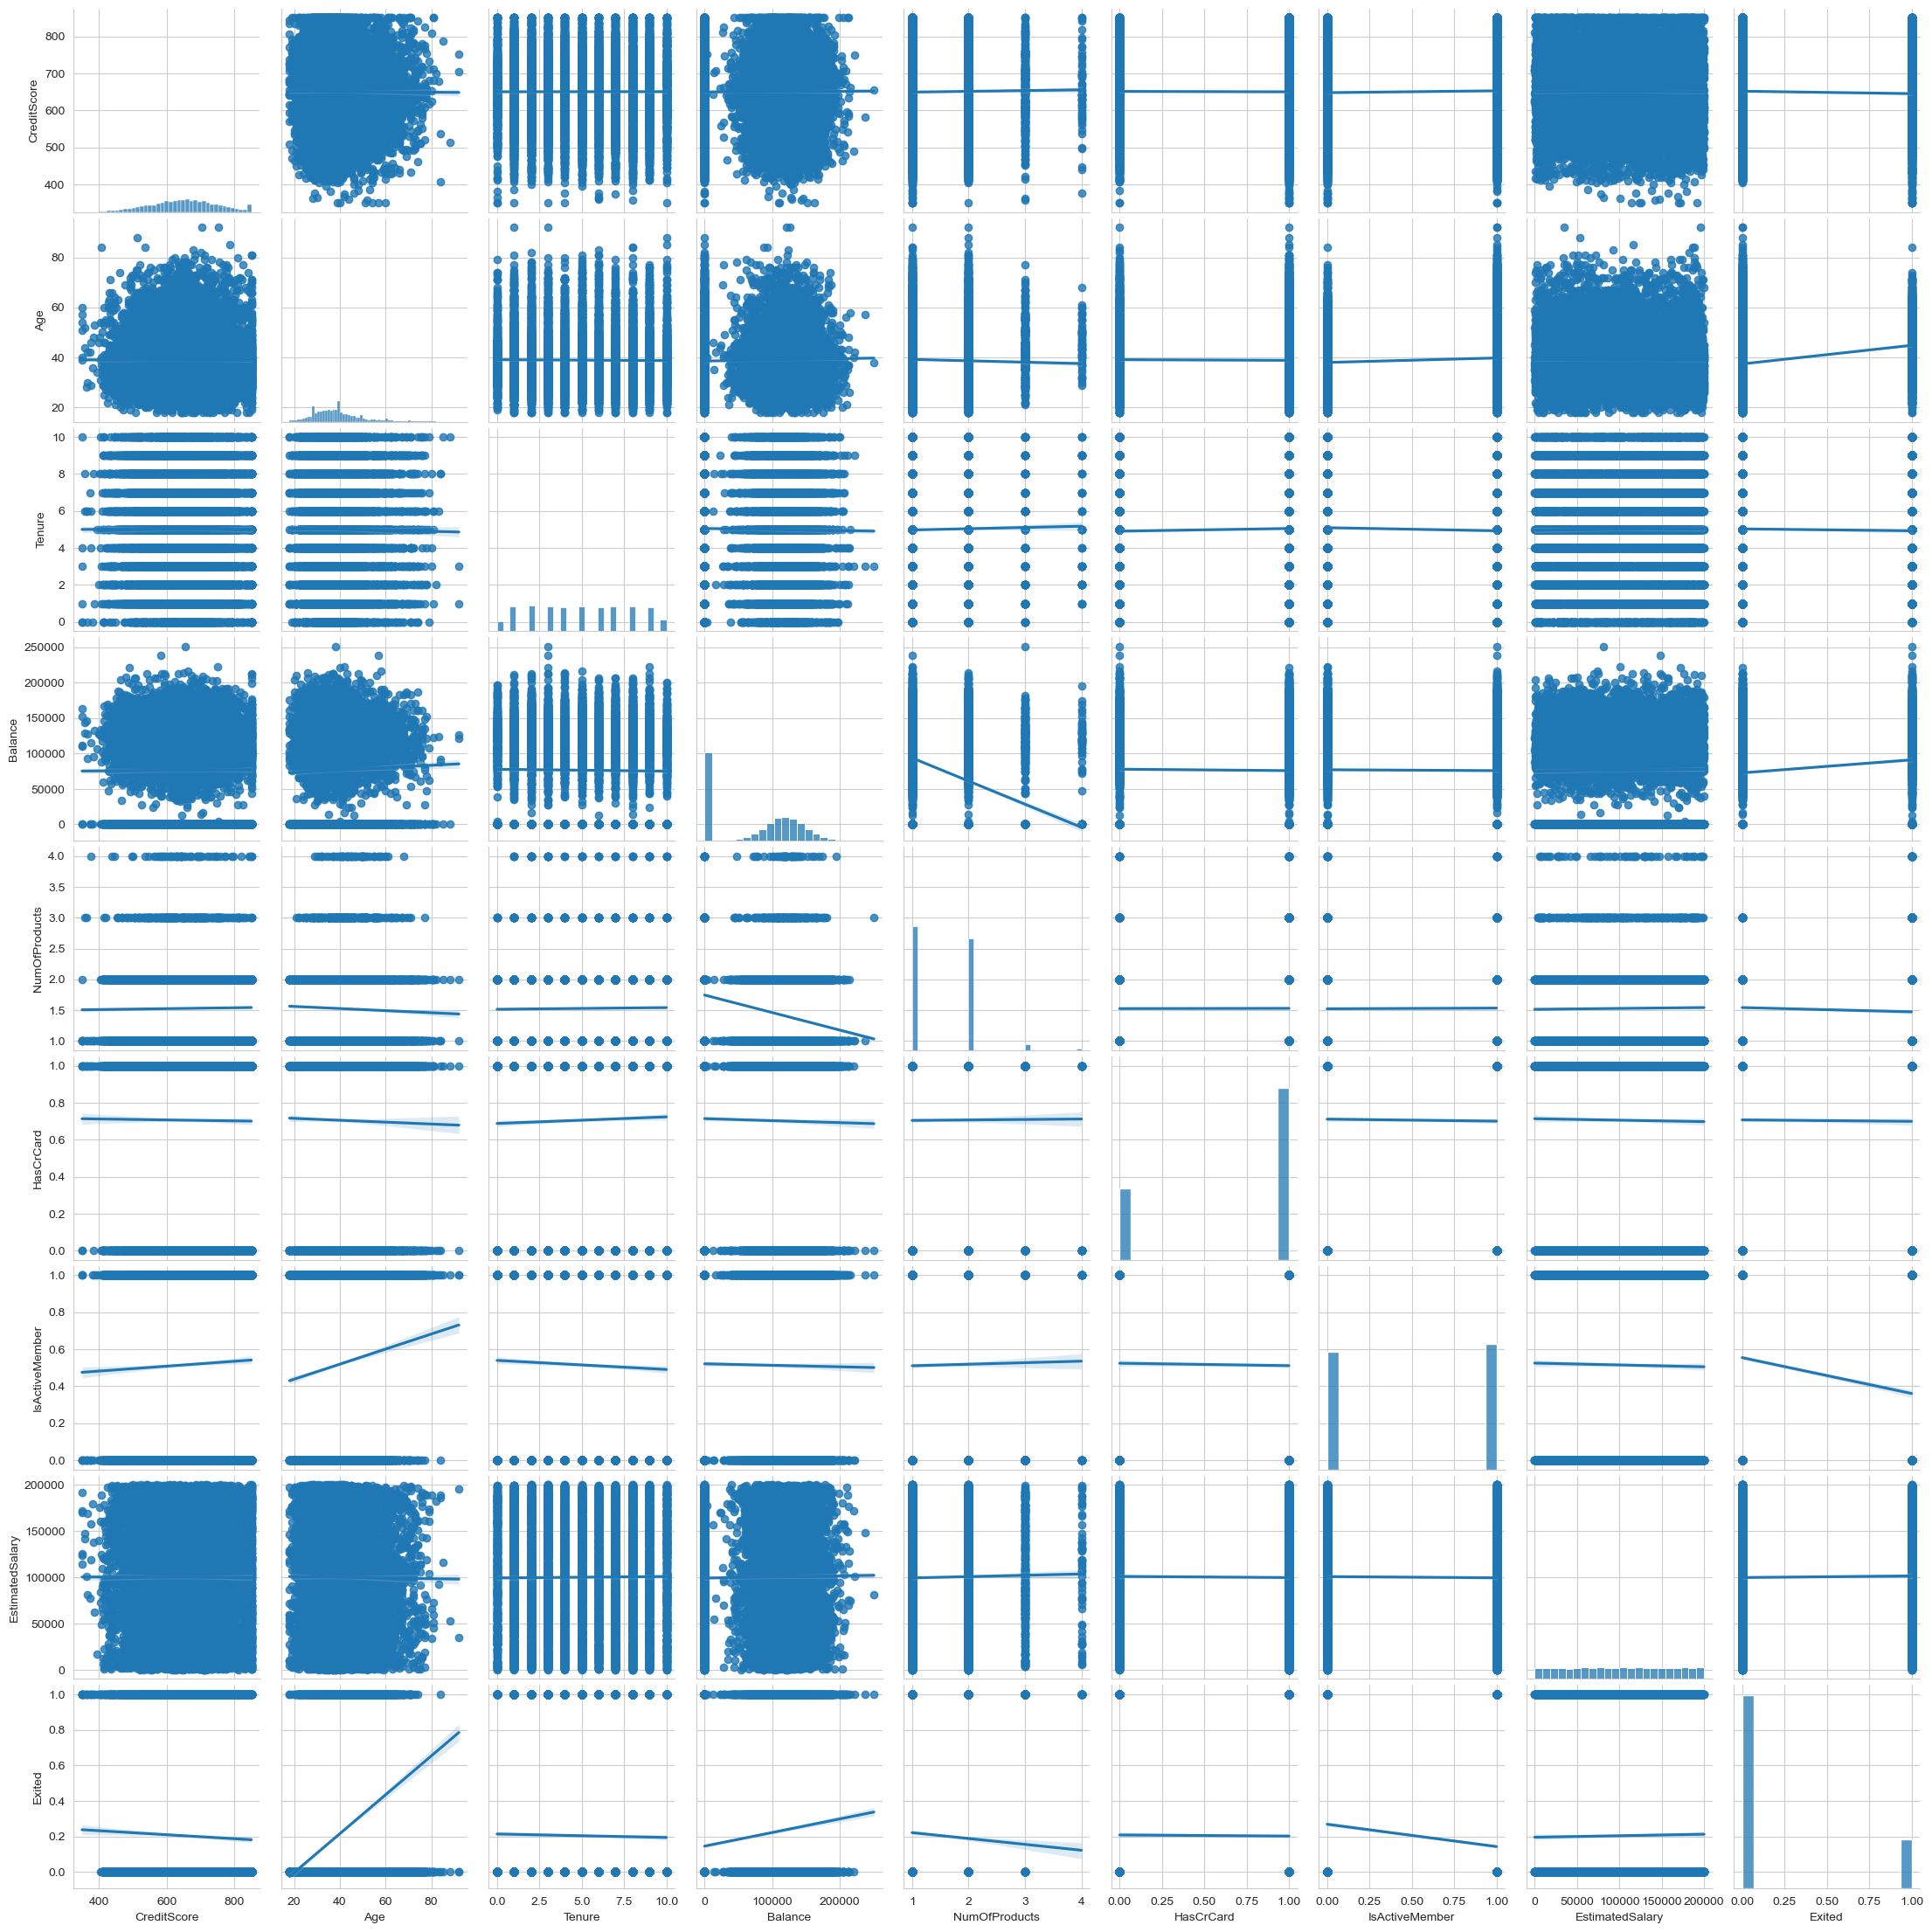

In [105]:
#Now, let's see tha pair plot
sns.pairplot(df, kind="reg")
plt.show()

# Preprocessing of Data
- Train | Test Split, Scalling

# Modelling & Model Performance

## without class_weigth

### Create The Model

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

### Add Dropout Layer

### Add Early Stop

#### Monitor the "val_loss" as metric

#### Monitor the "val_recall" as metric

## Optuna

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

# Final Model and Model Deployment

## Prediction

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___